In [1]:
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
import os
from astropy import units as u
from astropy import constants as c

In [2]:
import sys
from spin_class import * 
from spin_orientation_class import * 

In [3]:
path = '/Users/veomekapil/Library/CloudStorage/OneDrive-JohnsHopkins/Research/spins_in_field/Z_0.001/COMPAS_Output.h5' # change this line! 


In [4]:
# some plotting code, it should be fairly straightforward what the code does


def layoutAxes(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = 25, second=False, labelpad=None, setMinor=True, ):
    """
    Some code to do the layout for axes in matplotlib in a nice way 
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')


    if labelSizeMajor==10:
        ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
        ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad)#, fontweight='bold')    
    else:
        ax.set_xlabel(nameX, fontsize=labelSizeMajor,labelpad=labelpad)#,fontweight='bold')
        ax.set_ylabel(nameY, fontsize=labelSizeMajor,labelpad=labelpad)#, fontweight='bold')  

    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax

    


def plot_histogram_spin(spin_values, spin_model_name, weights=None, yscaleLOG=False, xmin=0.0, xmax=np.pi):
    """
    Creates weighted histogram of black hole spins (spin_values)
    """

    f, ax= plt.subplots(ncols=1,nrows=1, figsize=(8,5))

    plt.hist(spin_values, density=True, bins=20)

    ylabel=r'PDF (rate) ' 
    xlabel=r'spin orientation'

    plt.xlim(xmin, xmax)
    
    if yscaleLOG==True:
        ax.set_yscale('log')

    plt.title('spin orientation: ' + spin_model_name)
    layoutAxes(ax=ax, nameX=xlabel, nameY=ylabel,setMinor=False, fontsize=16)
    f.tight_layout() 
    plt.show()



    
    
    
def plot_scatter_general(xx, yy, cc, spin_model_name, ylabel=r'Period [day]', xlabel=r'$m_{\rm{WR}} \, [M_{\odot}]$ '):




    f, ax= plt.subplots(ncols=1,nrows=1, figsize=(8,5))

    plt.scatter(xx[0:100000], yy[0:100000],  c=cc[0:100000])




#     plt.xscale('log')
#     plt.yscale('log')
#     plt.xlim(1, 70)
#     plt.ylim(0.05, 10)

    cbar = plt.colorbar()
    cbar.set_label('spin', fontsize=20)
    cbar.ax.tick_params(labelsize='large')

    plt.title('spin' + spin_model_name)
    layoutAxes(ax=ax, nameX=xlabel, nameY=ylabel,setMinor=False, fontsize=16)
    f.tight_layout() 
    # plt.savefig('./BBH_COMPAS_model_A.png', dpi=600)#,\
    plt.show()
    
    
    

In [5]:
# class calculate_spin_orientation(object):
#     """
#     This class calculates the Black Hole (BH) or Neutron Star (NS) spin based on a given spin prescription
#     It returns the spin of the compact object M1, and compact object M2    
#     """

    
#     def __init__(self, data_path=None, spin_model_name='uniform'):
    
#         self.path                = data_path
        
#         if (self.path is None):
#             print("Warning: your hdf5 path is set to 'None'")
#         elif not  os.path.isfile(data_path):
#             raise ValueError("h5 file not found. Wrong path given?", "path given = %s"%data_path)
#         elif os.path.isfile(data_path):
#             self.h5file           = h5.File(data_path)
            
            
#         self.spin_model_name = spin_model_name
        
    

#     def fixed_value_spin_orientation(self, spin_theta):   
#         """
#         returns black hole spins with a fixed spin orientation 'spin_theta'
#         """
#         M1samples = self.h5file['BSE_Double_Compact_Objects']['Mass(1)'][...].squeeze()
        
#         self.theta1 = np.ones_like(a=M1samples) * spin_theta
#         self.theta2 = np.ones_like(a=M1samples) * spin_theta
        
#         return self.theta1, self.theta2


#     def natal_kick_misalignment(self):
#         """
#         Returns spinTheta1 and spinTheta2, the spin orientations of the compact objects formed from
#         the initial most massive star (M1) and initial least massive star (M2), respectively. 
        
#         In this model only the natal kicks contribute to a spin misalignment. 

#         Based on Eq 20 from https://arxiv.org/abs/2010.00078
    
#         """
        
#         # the following function reads in the COMPAS DCO parameters such as natal kick velocity and sets self.spinTheta1, self.spinTheta2 
#         # to arrays of zeros
#         self.setCOMPASData() 
        
#         ## Calculate spin for the ones that tidally spin up ##
                
#         # define mask of BHs that went SN first
#         # if BH (self.st==14) & formed first (self.M1formedSecond==0), use Eq. (20) to compute the spin orientation angle Theta.
#         maskM1_is_SN1 = (self.M1formedSecond==0)
#         maskM2_is_SN1 = (self.M1formedSecond==1)

#         maskM1_is_SN2 = (self.M1formedSecond==1)
#         maskM2_is_SN2 = (self.M1formedSecond==0)

#         u_k = self.SN_v_kick / self.SN_v_orb

#         # Eq. 20 (First SN): 
#         first_term = ( 1+ (u_k * np.cos(self.SN_kick_theta)) )
#         second_term =  ( u_k * np.sin(self.SN_kick_theta) * np.cos(self.SN_kick_phi))  
#         cos_Theta = first_term / np.sqrt((first_term**2) + (second_term)**2)

#         # Calculate the spin thetas for when the tilt is caused by SN1
#         self.theta1[maskM1_is_SN1]  =  np.arccos(cos_Theta)[self.mask_SN_is_M1][maskM1_is_SN1]
#         self.theta2[maskM2_is_SN1]  =  np.arccos(cos_Theta)[self.mask_SN_is_M2][maskM2_is_SN1]

#         # Calculate the second spin theta simply based on the kick (This is simplistic)
#         self.theta1[maskM1_is_SN2]  =  np.arccos(cos_Theta)[self.mask_SN_is_M1][maskM1_is_SN2]
#         self.theta2[maskM2_is_SN2]  =  np.arccos(cos_Theta)[self.mask_SN_is_M2][maskM2_is_SN2]


#         # # any BHs that experienced SN will have tilted spins, all others will have gamma = 0 after tidal alignment
#         # gamma1 = self.theta1 
#         # gamma2 = self.theta2

#         # # Eq. 21 (Second SN):
#         # # S1
#         # first_term = ( 1+ (u_k * np.cos(self.SN_kick_theta)) ) * np.cos(gamma1)
#         # second_term =  ( u_k * np.sin(self.SN_kick_theta) * np.cos(self.SN_kick_phi))  
#         # cos_Theta = first_term / np.sqrt((first_term**2) + (second_term)**2)

#         # # Calculate the spin thetas for when the tilt is caused by SN2, with the initial spin being aligned with L
#         # self.theta1[maskM1_is_SN2]  =  np.arccos(cos_Theta)[self.mask_SN_is_M1][maskM1_is_SN2]
#         # self.theta2[maskM2_is_SN2]  =  np.arccos(cos_Theta)[self.mask_SN_is_M2][maskM2_is_SN2]
        
        
#         return self.theta1, self.theta2


#     def convert_a_to_P_circular(self, separation, M1, M2):
#         """calculate Period from separation
#         separation is separation (needs to be given in astropy units)
#         M1 and M2 are masses of the binary

#         """
#         G = c.G # [gr cm s^2]


#         mu = G*(M1+M2)
#         self.PeriodPreSN2 = 2*np.pi * np.sqrt(separation**3/mu)
        
#     def setCOMPASData(self):
#         """ reads in some of the COMPAS parameters needed from hdf5 file """
        

#         # """ reads in some of the COMPAS parameters needed from hdf5 file """

#         fDCO      = self.h5file['BSE_Double_Compact_Objects'] # hdf5 file with the DCO information
#         fSN       = self.h5file['BSE_Supernovae']  # hdf5 file with the SN information
#         fini      = self.h5file['BSE_System_Parameters']  # hdf5 file with initial parameters
#         # #
#         self.SEED_dco = fDCO['SEED'][...].squeeze()


        
#         mask_dco_SN  = np.in1d(fSN['SEED'][...].squeeze(), self.SEED_dco) # mask in the SNe files the SNe that correspond to our DCO               
#         # first, remove simulteneous_SN
#         whichSN = fSN['Supernova_State'][...].squeeze()[mask_dco_SN] 
#         mask_no_simulteneous_SN = (whichSN[0::2]!=3) & (whichSN[1::2]!=3)
        
#         # remove BNS
#         self.st1 = fDCO['Stellar_Type(1)'][...].squeeze()
#         self.st2 = fDCO['Stellar_Type(2)'][...].squeeze()
        
#         mask_contains_BH = ((self.st1==14) | (self.st2==14)) & (mask_no_simulteneous_SN==1)
        
        
#         mask_dco_ini  = np.in1d(fini['SEED'][...].squeeze(), self.SEED_dco[mask_contains_BH]) #  update mask removing simulteneous SNe
#         mask_dco_SN   = np.in1d(fSN['SEED'][...].squeeze() , self.SEED_dco[mask_contains_BH]) #  update mask removing simulteneous SNe      

#         self.st1 =  self.st1[mask_contains_BH]
#         self.st2 =  self.st2[mask_contains_BH]
#         self.M1 = fDCO['Mass(1)'][...].squeeze()[mask_contains_BH]   # Compact object mass [Msun] of the initially more massive star
#         self.M2 = fDCO['Mass(2)'][...].squeeze()[mask_contains_BH]  # Compact object mass [Msun] of the initially less massive star

        
        
#         mask_dco_ini  = np.in1d(fini['SEED'][...].squeeze(), self.SEED_dco[mask_contains_BH]) # mask in the initial parameter files the SNe that correspond to our DCO that are BHs
#         mask_dco_SN  = np.in1d(fSN['SEED'][...].squeeze(), self.SEED_dco[mask_contains_BH]) # mask in the SNe files the SNe that correspond to our DCO that are BHs        
        
        
#         self.metallicitySystems  = fini['Metallicity@ZAMS(1)'][...].squeeze()[mask_dco_ini] 

#         whichSN = fSN['Supernova_State'][...].squeeze()[mask_dco_SN]   # this is 1 if the initially primary star goes SN and 2 if the secondary goes supernova
#         whichSN2 = whichSN[1::2] # get whichStar for the first SN   (there are 2 SNe for all DCOs)       
#         self.mask_SN_is_M1 = (whichSN==1)
#         self.mask_SN_is_M2 = (whichSN==2) 
        
#         self.separationPreSN2= fSN['SemiMajorAxis<SN'][...].squeeze()[mask_dco_SN][1::2] # the separation just before each SN  in [Rsun], we need only the separation for the second SN to occur, so the [1::2]  

#         self.convert_a_to_P_circular(separation=self.separationPreSN2*u.Rsun, M1=self.M1*u.Msun, M2=self.M2*u.Msun)  # obtain the Period before the SNe
#         self.PeriodPreSN2 = self.PeriodPreSN2.to(u.d).value
#         self.MassCOM1CoreSN = fSN['Mass_CO_Core@CO(SN)'][...].squeeze()[mask_dco_SN][self.mask_SN_is_M1]   # obtain the CO core mass before the SNe when M1 goes SN
#         self.MassCOM2CoreSN = fSN['Mass_CO_Core@CO(SN)'][...].squeeze()[mask_dco_SN][self.mask_SN_is_M2]   # obtain the CO core mass before the SNe when M2 goes SN

#         # self.SN_v_kick = fSN['ComponentSpeed(SN)'][...].squeeze()[mask_dco_SN]   # obtain the SN kick velocity
#         self.SN_v_kick = fSN['Drawn_Kick_Magnitude(SN)'][...].squeeze()[mask_dco_SN]   # obtain the SN kick velocity

#         self.SN_v_orb = fSN['Orb_Velocity<SN'][...].squeeze()[mask_dco_SN]   # obtain the orbital velocity before SN
#         self.SN_kick_theta = fSN['SN_Kick_Theta(SN)'][...].squeeze()[mask_dco_SN]   # obtain the SN kick theta 
#         self.SN_kick_phi = fSN['SN_Kick_Phi(SN)'][...].squeeze()[mask_dco_SN]  # obtain the SN kick phi

#         self.theta1, self.theta2 = np.zeros_like(self.M1), np.zeros_like(self.M2)  # start by giving all primaries zero spin and all secondaries zero spin 
#         # # did M1 form in the first SN?
#         self.M1formedSecond =  (whichSN2==1) # mask that is 1 if the  compact object M1 formed first in the DCO
#         # # did M2 form in the first SN?
#         self.M2formedSecond =  (whichSN2==2)  # mask that is 1 if the compact object M2 formed first in the DCO
#         # Wolf-Rayet mass 
#         self.mWR =  fSN['Mass_Total@CO(SN)'][...].squeeze()[mask_dco_SN][1::2]   # obtain the WR mass before the SNe

# Model 0: Spins are aligned, at fixed angle

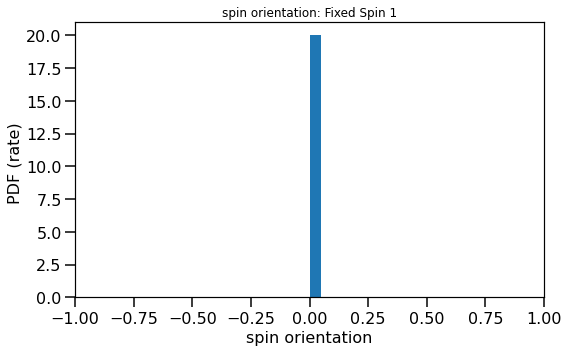

In [10]:
spin_orientation = calculate_spin_orientation(data_path=path)
spinTheta1, spinTheta2  = spin_orientation.fixed_value_spin_orientation(spin_theta=0.0)

plot_histogram_spin(spin_values=(spinTheta1), spin_model_name='Fixed Spin 1', xmin=-1, xmax=1)

# Model 1: Spins are Uniformly oriented on [low, high]

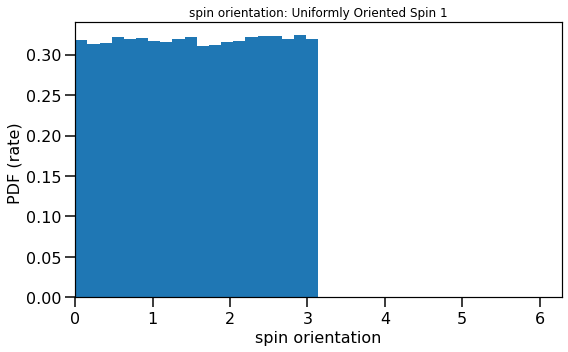

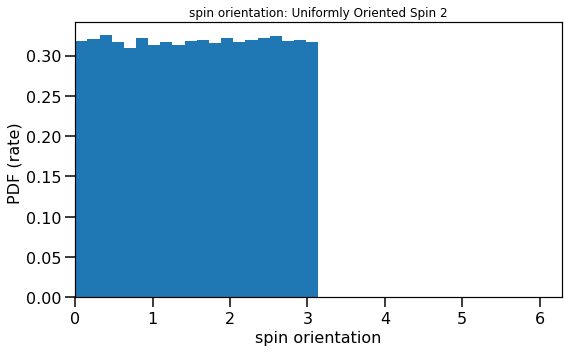

In [7]:
spin_orientation = calculate_spin_orientation(data_path=path)
spinTheta1, spinTheta2  = spin_orientation.random_uniform_spin_orientation(low=0., high=np.pi)

plot_histogram_spin(spin_values=(spinTheta1), spin_model_name='Uniformly Oriented Spin 1', xmax=2*np.pi)
plot_histogram_spin(spin_values=(spinTheta2), spin_model_name='Uniformly Oriented Spin 2', xmax=2*np.pi)

# Model 2: Spins-orbit misalignment from natal kicks 

Following Steinle & Kesden 2021 (https://arxiv.org/abs/2010.00078), Section C.4, we calculate the spin misalignent from the action of a natal kick that tilts the orbital plane. For initially alligned spins, the angle $\Theta$ between the spins $\vec{S_i}$ and the orbital angular momentum $\vec{L}$ following the natal kick is given by Eq. (20):

$$ \cos \Theta = \frac{1+ u_k \cos \theta_k}{[ (1+ u_k \cos \theta_k)^2 + (u_k \sin \theta_k \cos \phi_k)^2]^{1/2}} $$

where $u_k \equiv v_k / v_{orb}$, $\phi_k$ is the azimuthal angle of the kick in the plane perpendicular to the orbit. $\phi_k = 0$ means that the kick is aligned with $\vec{L}$.

Currently, the spin orientations following BOTH SN are calculated using the above formula. This is incorrect. Will be using the appropriate formula for the second SN misalignment soon.




<!-- 
For simplicity, we will assume no spin precession between SN1 and SN2, such that the only dominant change in spin orientation is due to *tidal realignment*. 

Thus, the angle $\gamma$ between $\vec{S_2}$ and $\vec{L}$ is 0 before SN2. After SN2, the angles $\theta_i$ between each spin $\vec{S_i}$ and $\vec{L}$ are given by Eq. (21):
$$ \cos \theta_i = \frac{(1+ u_k \cos \theta_k) \cos \gamma_i - u_k \sin \theta_k\cos \phi_k \sin \gamma_i \sin \omega_i}{ [(1+ u_k \cos \theta_k)^2 + (u_k \sin \theta_k \cos \phi_k)^2]^{1/2}} $$ 

-->


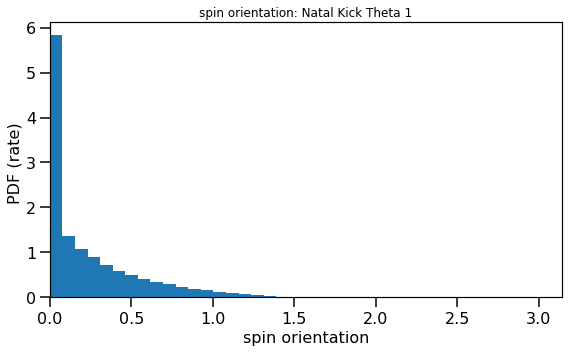

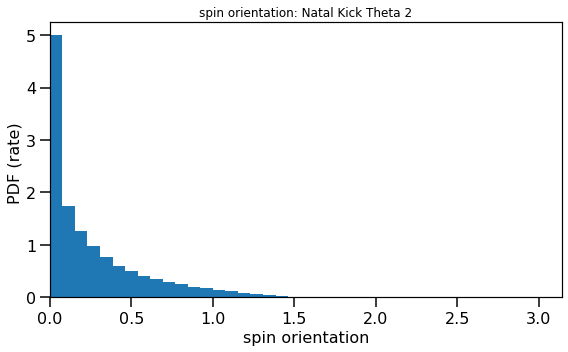

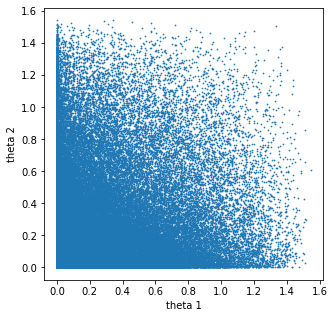

In [13]:
spin_orientation = calculate_spin_orientation(data_path=path)
spinTheta1, spinTheta2  = spin_orientation.natal_kick_misalignment()

plot_histogram_spin(spin_values=(spinTheta1), spin_model_name='Natal Kick Theta 1')
plot_histogram_spin(spin_values=(spinTheta2), spin_model_name='Natal Kick Theta 2')

# plot_histogram_spin(spin_values=(spinTheta1-spinTheta2), spin_model_name='Natal Kick: Theta 1 - Theta 2')

plt.rcParams["figure.figsize"] = (5,5)
plt.scatter(spinTheta1, spinTheta2, s=0.5)
plt.xlabel('theta 1')
plt.ylabel('theta 2')
plt.show()

# Workspace

In [133]:
h5file           = h5.File(path)

fDCO      = h5file['BSE_Double_Compact_Objects'] # hdf5 file with the DCO information
fSN       = h5file['BSE_Supernovae']  # hdf5 file with the SN information
fini      = h5file['BSE_System_Parameters']  # hdf5 file with initial parameters
# #
SEED_dco = fDCO['SEED'][...].squeeze()



mask_dco_SN  = np.in1d(fSN['SEED'][...].squeeze(), SEED_dco) # mask in the SNe files the SNe that correspond to our DCO               
# first, remove simulteneous_SN
whichSN = fSN['Supernova_State'][...].squeeze()[mask_dco_SN] 
mask_no_simulteneous_SN = (whichSN[0::2]!=3) & (whichSN[1::2]!=3)

# remove BNS
st1 = fDCO['Stellar_Type(1)'][...].squeeze()
st2 = fDCO['Stellar_Type(2)'][...].squeeze()

mask_contains_BH = ((st1==14) | (st2==14)) & (mask_no_simulteneous_SN==1)


mask_dco_ini  = np.in1d(fini['SEED'][...].squeeze(), SEED_dco[mask_contains_BH]) #  update mask removing simulteneous SNe
mask_dco_SN   = np.in1d(fSN['SEED'][...].squeeze() , SEED_dco[mask_contains_BH]) #  update mask removing simulteneous SNe      

st1 =  st1[mask_contains_BH]
st2 =  st2[mask_contains_BH]
M1 = fDCO['Mass(1)'][...].squeeze()[mask_contains_BH]   # Compact object mass [Msun] of the initially more massive star
M2 = fDCO['Mass(2)'][...].squeeze()[mask_contains_BH]  # Compact object mass [Msun] of the initially less massive star



mask_dco_ini  = np.in1d(fini['SEED'][...].squeeze(), SEED_dco[mask_contains_BH]) # mask in the initial parameter files the SNe that correspond to our DCO that are BHs
mask_dco_SN  = np.in1d(fSN['SEED'][...].squeeze(), SEED_dco[mask_contains_BH]) # mask in the SNe files the SNe that correspond to our DCO that are BHs        


metallicitySystems  = fini['Metallicity@ZAMS(1)'][...].squeeze()[mask_dco_ini] 

whichSN = fSN['Supernova_State'][...].squeeze()[mask_dco_SN]   # this is 1 if the initially primary star goes SN and 2 if the secondary goes supernova
whichSN2 = whichSN[1::2] # get whichStar for the first SN   (there are 2 SNe for all DCOs)       
mask_SN_is_M1 = (whichSN==1)
mask_SN_is_M2 = (whichSN==2) 

separationPreSN2= fSN['SemiMajorAxis<SN'][...].squeeze()[mask_dco_SN][1::2] # the separation just before each SN  in [Rsun], we need only the separation for the second SN to occur, so the [1::2]  


MassCOM1CoreSN = fSN['Mass_CO_Core@CO(SN)'][...].squeeze()[mask_dco_SN][mask_SN_is_M1]   # obtain the CO core mass before the SNe when M1 goes SN
MassCOM2CoreSN = fSN['Mass_CO_Core@CO(SN)'][...].squeeze()[mask_dco_SN][mask_SN_is_M2]   # obtain the CO core mass before the SNe when M2 goes SN

SN_v_kick = fSN['Drawn_Kick_Magnitude(SN)'][...].squeeze()[mask_dco_SN]   # obtain the SN kick velocity
SN_v_orb = fSN['Orb_Velocity<SN'][...].squeeze()[mask_dco_SN]   # obtain the orbital velocity before SN
SN_kick_theta = fSN['SN_Kick_Theta(SN)'][...].squeeze()[mask_dco_SN]   # obtain the SN kick theta 
SN_kick_phi = fSN['SN_Kick_Phi(SN)'][...].squeeze()[mask_dco_SN]  # obtain the SN kick phi

theta1, theta2 = np.zeros_like(M1), np.zeros_like(M2)  # start by giving all primaries zero spin and all secondaries zero spin 
# # did M1 form in the first SN?
M1formedSecond =  (whichSN2==1) # mask that is 1 if the  compact object M1 formed first in the DCO
# # did M2 form in the first SN?
M2formedSecond =  (whichSN2==2)  # mask that is 1 if the compact object M2 formed first in the DCO
# Wolf-Rayet mass 
mWR =  fSN['Mass_Total@CO(SN)'][...].squeeze()[mask_dco_SN][1::2]   # obtain the WR mass before the SNe

(array([225.,  60.,   6.,   4.,   1.,   2.,   0.,   1.,   0.,   1.]),
 array([0.        , 0.13798838, 0.27597677, 0.41396515, 0.55195354,
        0.68994192, 0.82793031, 0.96591869, 1.10390708, 1.24189546,
        1.37988385]),
 <BarContainer object of 10 artists>)

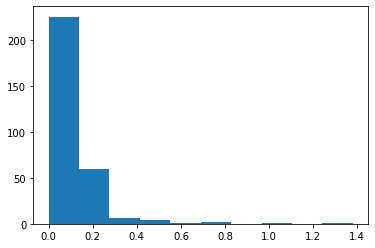

In [161]:
maskM1_is_SN1 = (M1formedSecond==0)
maskM2_is_SN1 = (M1formedSecond==1)

# u_k = SN_v_kick[mask_SN_is_M1][maskM1_is_SN1] / SN_v_orb[mask_SN_is_M1][maskM1_is_SN1]
# sn_theta = SN_kick_theta[mask_SN_is_M1][maskM1_is_SN1]
# sn_phi = SN_kick_phi[mask_SN_is_M1][maskM1_is_SN1]

u_k = SN_v_kick[mask_SN_is_M2][maskM2_is_SN1] / SN_v_orb[mask_SN_is_M2][maskM2_is_SN1]
sn_theta = SN_kick_theta[mask_SN_is_M2][maskM2_is_SN1]
sn_phi = SN_kick_phi[mask_SN_is_M2][maskM2_is_SN1]

# # Eq. 20: 
first_term = ( 1+ (u_k * np.cos(sn_theta)) )
second_term =  ( u_k * np.sin(sn_theta) * np.cos(sn_phi))  
cos_Theta = first_term / np.sqrt((first_term**2) + (second_term)**2)

plt.hist(np.arccos(cos_Theta))